MNS Practical_Sheet 2: Leonard v. Hollander

Hopfield networks: 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# (a): store the patterns: patterns are stored 

A = np.array([1,-1,1,-1])
B = np.array([-1,1,1,1])
C = np.array([-1,-1,-1,1])

#Next we determined the weight matrix:

def get_wghtmatr (pats):
    
    """
    pats: a set of patterns, 2-D array
    
    """ 
    pat_num = len(pats)
    pat_dim = len(pats[0])
    
    temp_matr = np.sum(list(map(lambda X: np.outer(X,X), pats)), axis = 0)
    
    return temp_matr - pat_num * np.identity(pat_dim)

wght_matr = get_wghtmatr([A,B,C])

# In order to determine the outputs, what we are doing is simply computing the output of the network
# upon presentation of a pattern 

def hop_out (matr, pat):
    """
    matr: weight matrix 
    pat: input pattern
    
    """
    
    return np.sign(np.dot(matr, pat))

#Define stability property:

is_stable = lambda matr, pat: np.all(hop_out(matr,pat) == pat)

for pat in ([A,B,C]):
    
    print("Pattern", pat,("is stable" if (is_stable(wght_matr, pat)) else "is instable"), 
                           "and converges to", hop_out(wght_matr, pat))
                                                    
        




Pattern [ 1 -1  1 -1] is stable and converges to [ 1. -1.  1. -1.]
Pattern [-1  1  1  1] is instable and converges to [-1.  1. -1.  1.]
Pattern [-1 -1 -1  1] is instable and converges to [-1.  1. -1.  1.]


This tells us that pattern A is stable, whereas patterns B and C are instable 

In [2]:
# (b): calculate the energy: pat_matr [i,j] = s_is_j. 

def energ (matr, pat):
    
    """
    matr: a wight matrix
    pat: input pattern
    
    """
    
    pat_matr = np.outer(pat,pat)
    
    
    return - np.sum(np.multiply(matr, pat_matr))

#Calculates the energy in the network over successive presentations of the same pattern 
#and returns the updated pattern

def energ_step (pat, matr, max_steps):
    
    """
    pat: input pattern
    max_steps: an integer
    
    """
    pat_copy = pat.copy()
    energ_seq = np.zeros(max_steps)
    energ_seq[0] = energ(matr, pat)
    
    for i in range (1, max_steps):
        
        if (is_stable(matr, pat)):
            
            energ_seq[i: max_steps] = energ(matr, pat_copy)
            
            break
            
        else:
            
            j = np.random.choice(np.arange(0,len(pat)))
        
            pat_copy[j] = np.sign(np.dot(matr[j],pat_copy))
            
            hop_out(matr, pat_copy)[j]
            
            energ_seq[i] = energ(matr, pat_copy)
                                  
    return {'energy': energ_seq, 'pattern': pat_copy}

A_steps = energ_step(A,wght_matr,15)['energy']
B_steps = energ_step(B,wght_matr,15)['energy']
C_steps = energ_step(C,wght_matr,15)['energy']

print(C_steps)
print(B_steps)
print(A_steps)
    

[ -8.  -8.  -8.  -8.  -8.  -8.  -8.  -8.  -8. -12. -12. -12. -12. -12.
 -12.]
[ -8.  -8.  -8.  -8.  -8.  -8. -12. -12. -12. -12. -12. -12. -12. -12.
 -12.]
[-12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12.
 -12.]


Text(0.5, 15.0, 'steps')

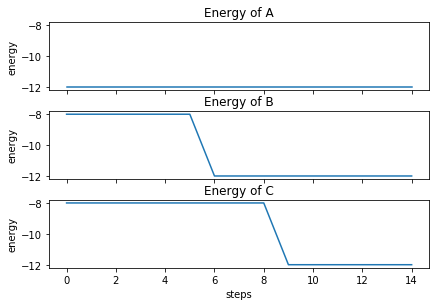

In [3]:
# Printing the energy_functions:

fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex = True, sharey = True)

fig.tight_layout()

ax1.plot(A_steps)
ax1.set_title("Energy of A")
ax1.set_ylabel('energy')
ax2.plot(B_steps)
ax2.set_title("Energy of B")
ax2.set_ylabel('energy')
ax3.plot(C_steps)
ax3.set_title("Energy of C")
ax3.set_ylabel('energy')
ax3.set_xlabel('steps')


Exercise 3:

In [4]:
import os 
os.getcwd()

#Part 1: Load the data

data = np.load('arr_0.npy')

#Part 2: Compute the weight matrix over all the images @data

flat_data = (np.array(list(map(lambda X: np.ndarray.flatten(X), data))))
pixel_wghts = get_wghtmatr(flat_data)

print(pixel_wghts)



FileNotFoundError: [Errno 2] No such file or directory: 'arr_0.npy'

In [ ]:
# Part 3: The patterns are drawn from flat_data

for pat in flat_data:
    
     print("Pattern", pat,("is stable" if (np.all(hop_out(pixel_wghts,pat) == pat)) else "is instable"), 
                           "and converges to", hop_out(pixel_wghts, pat))
    
    

We can surmise that the third pattern is instable, while all other patterns are stable

In [ ]:
#Part 4: 

#Generate a random pattern:

def run ():
    
    ran_pat = np.random.choice([-1,1], 1200)
    
    final_pat = energ_step(ran_pat, pixel_wghts, 5000)['pattern'].reshape((30,40))
    
    plt.imshow(final_pat)
    
    return final_pat



This nicely demonstrates the inner workings of the Hopfield network. The weight matrix defines in an attractor landscape, in which states attract and repel one another. The final image is the attractor closest to the random pattern. The accuracy of the image scales with the number of steps. Since on every iteration we pick only a single entry to update, we need to pick the number of steps such that it is large enough, for every bit x, the probability of that x not being selected is relatively small. 

In [ ]:
#We'll try with another random pattern:

for i in range (3):

    ran_pat = np.random.choice([-1,1], 1200)
    pixels = energ_step(ran_pat, pixel_wghts, 5000)
    final_pat = pixels['pattern']
    energs = pixels['energy']
    final_pat = np.reshape(final_pat, (30,40))
    ran_pat = np.reshape(ran_pat, (30,40))
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (6,6))

    ax1.imshow(ran_pat)
    ax1.set_title('Random Pattern')
    ax2.imshow(final_pat)
    ax2.set_title('Final Pattern')
    ax3.plot(energs)
    ax3.set_xlabel('Iterations')
    ax3.yaxis.set_label_position("right")
    ax3.set_ylabel('Energy')
    ax3.set_title('Energy over Iterations')
    
    
    plt.subplots_adjust(wspace = 0.8)






In [ ]:
#Part 5: Randomly select one of the memory patterns

rand_index = np.random.choice(np.arange(0,len(flat_data)))
mem = flat_data[rand_index]
ran_pat = np.random.choice([-1,1], 1200)
ran_pat[0:300] = mem[0:300]

pixels = energ_step(ran_pat, pixel_wghts, 10000)
final_pat = pixels['pattern']
energs = pixels['energy']
ran_pat = np.reshape(ran_pat, (30,40))
final_pat = np.reshape(final_pat, (30,40))
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (6,6))

ax1.imshow(ran_pat)
ax1.set_title('Random Pattern')
ax2.imshow(final_pat)
ax2.set_title('Final Pattern')
ax3.plot(energs)
ax3.set_xlabel('Iterations')
ax3.yaxis.set_label_position("right")
ax3.set_ylabel('Energy')
ax3.set_title('Energy over Iterations')
    

